# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data_df = pd.merge(mouse_metadata, study_results,
                                 how="right", on="Mouse ID")


# Display the data table for preview
combined_mouse_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.

unique_mice_count = combined_mouse_data_df['Mouse ID'].nunique()

print(f'Total number of mice: {unique_mice_count}')

Total number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates_mice = combined_mouse_data_df[combined_mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
sorted_df = duplicates_mice.sort_values(by=['Mouse ID', 'Timepoint'])
print(sorted_df)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            4

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_mice_df = combined_mouse_data_df[combined_mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
sorted_df = duplicates_mice_df.sort_values(by=['Mouse ID', 'Timepoint'])
sorted_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice_df = combined_mouse_data_df.drop_duplicates(subset=['Mouse ID'])

cleaned_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0
...,...,...,...,...,...,...,...,...
245,t565,Capomulin,Female,20,17,0,45.0,0
246,i557,Capomulin,Female,1,24,0,45.0,0
247,m957,Capomulin,Female,3,19,0,45.0,0
248,f966,Capomulin,Male,16,17,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.

number_of_mice = combined_mouse_data_df['Mouse ID'].nunique()

print(number_of_mice)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

summary_statistics_df = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean = 'mean',
    median	= 'median',
    variance = 'var',
    std_dev ='std',
    sem = lambda x: np.std(x, ddof=1) / np.sqrt(len(x))
).reset_index()

# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_aggregate = combined_mouse_data_df.groupby('Drug Regimen').agg(mean =('Tumor Volume (mm3)', 'mean'),
                                               variance =('Tumor Volume (mm3)', 'var'),
                                               std =('Tumor Volume (mm3)', 'std'),
                                               sem =('Tumor Volume (mm3)', lambda x: x.std() / (len(x) ** 0.5)))
summary_statistics_aggregate

,mean,variance,std,sem
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.322552,42.351070,6.507770,0.512884
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
drug_regimen_counts = combined_mouse_data_df.groupby('Drug Regimen').size()

drug_regimen_counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

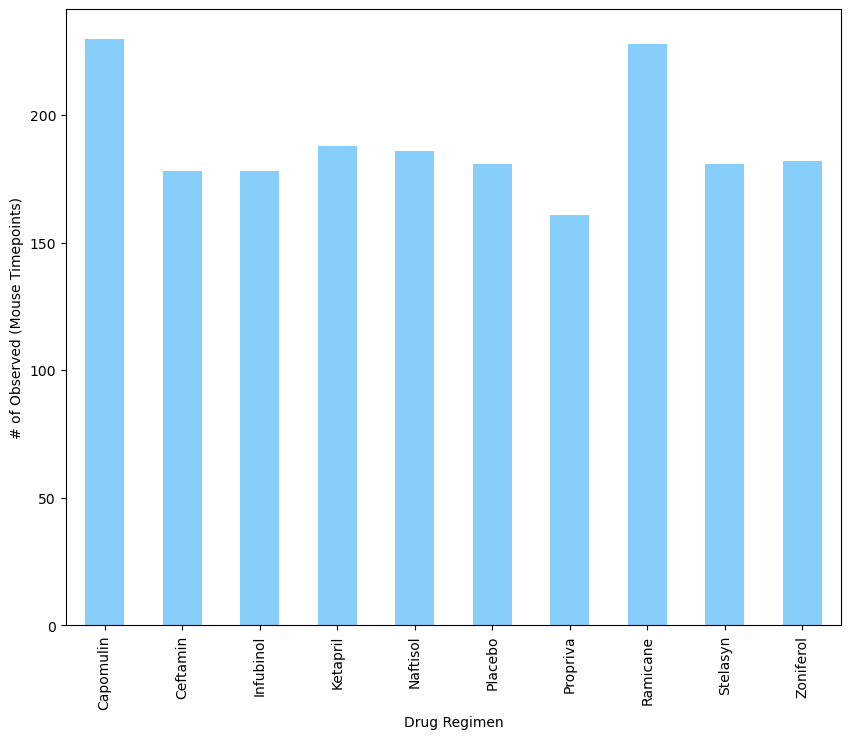

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_chart = drug_regimen_counts.plot(kind='bar', figsize=(10, 8), color='lightskyblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed (Mouse Timepoints)')
plt.xticks(rotation= 90)
plt.show()

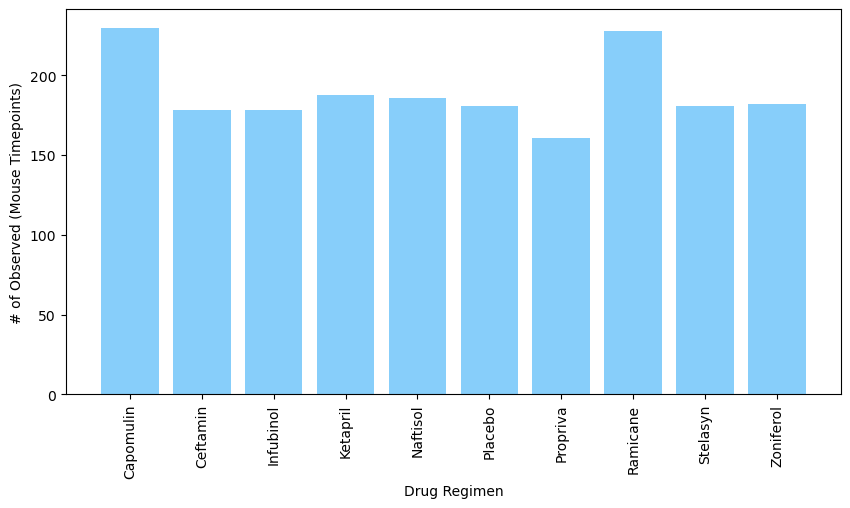

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_chart = drug_regimen_counts.groupby('Drug Regimen').size()

plt.figure(figsize=(10, 5))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='lightskyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed (Mouse Timepoints)')

plt.xticks(rotation=90)
plt.show()

In [12]:
sex_counts = mouse_metadata['Sex'].value_counts()
sex_counts

Sex
Male      125
Female    124
Name: count, dtype: int64

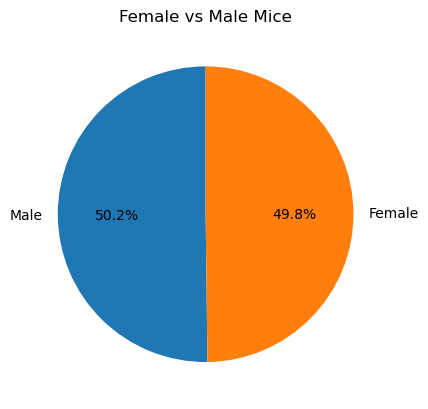

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_count = mouse_metadata['Sex'].value_counts()
sex_count

# Make the pie chart
sex_count.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Female vs Male Mice')
plt.ylabel('')  
plt.show()

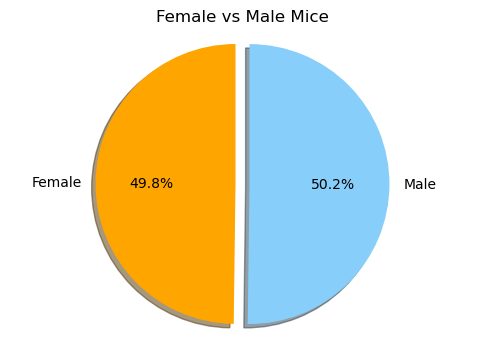

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_counts = mouse_metadata['Sex'].value_counts()
sex_counts

# Make the pie chart
labels = ['Female', 'Male']
sizes = [124, 125]  
colors = ['orange', 'lightskyblue']
explode = (0.1, 0)  

plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')  
plt.title('Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
#greatest_timepoint_df = combined_mouse_data_df.groupby(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']).max().reset_index()
#greatest_timepoint_df.head()



In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


last_tumor = cleaned_mice_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
print (last_tumor)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data_result = last_tumor.merge(cleaned_mice_df, on=['Mouse ID','Timepoint'],how="left")
print(merged_data_result)



    Mouse ID  Timepoint
0       a203          0
1       a251          0
2       a262          0
3       a275          0
4       a366          0
..       ...        ...
244     z435          0
245     z578          0
246     z581          0
247     z795          0
248     z969          0

[249 rows x 2 columns]
    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203          0    Infubinol  Female          20          23   
1       a251          0    Infubinol  Female          21          25   
2       a262          0      Placebo  Female          17          29   
3       a275          0     Ceftamin  Female          20          28   
4       a366          0     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
244     z435          0     Propriva  Female          12          26   
245     z578          0     Ramicane    Male          11          16   
246     z581          0    Infubinol  Fe

In [17]:
# Put treatments into a list for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_result.loc[merged_data_result["Drug Regimen"] == drug, 'Tumor Volume (mm3)']


    # add subset
    tumor_vol_data.append(final_tumor_vol)


    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Data Verification:
Capomulin: 25 measurements
Ramicane: 25 measurements
Infubinol: 25 measurements
Ceftamin: 25 measurements


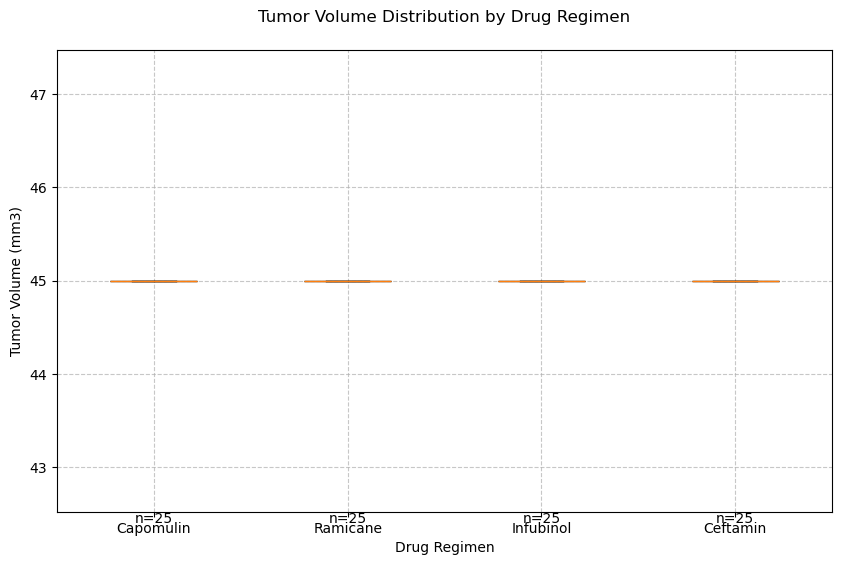


Statistical Summary:

Capomulin:
Count: 25
Mean: 45.00
Median: 45.00
Std Dev: 0.00

Ramicane:
Count: 25
Mean: 45.00
Median: 45.00
Std Dev: 0.00

Infubinol:
Count: 25
Mean: 45.00
Median: 45.00
Std Dev: 0.00

Ceftamin:
Count: 25
Mean: 45.00
Median: 45.00
Std Dev: 0.00


In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# First, get the data for each treatment

try:
    # Define treatments
    treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
 
    # Verify data exists
    print("Data Verification:")
    valid_treatments = []
    tumor_vol_data = []
 
    for treatment in treatments:
        # Get data for this treatment
        mask = cleaned_mice_df["Drug Regimen"] == treatment
        treatment_data = cleaned_mice_df[mask]["Tumor Volume (mm3)"]
 
        if len(treatment_data) > 0:
            tumor_vol_data.append(treatment_data.values.tolist())
            valid_treatments.append(treatment)
            print(f"{treatment}: {len(treatment_data)} measurements")
        else:
            print(f"Warning: No data found for {treatment}")
 
    if tumor_vol_data:
        # Create figure
        plt.figure(figsize=(10, 6))
 
        # Create boxplot
        bp = plt.boxplot(tumor_vol_data, 
                        tick_labels=valid_treatments,
                        patch_artist=True,
                        flierprops=dict(markerfacecolor='red', 
                                      marker='o', 
                                      markersize=10),
                        boxprops=dict(facecolor='lightblue'))
 
        # Customize plot
        plt.title("Tumor Volume Distribution by Drug Regimen", pad=20)
        plt.ylabel("Tumor Volume (mm3)")
        plt.xlabel("Drug Regimen")
        plt.grid(True, linestyle='--', alpha=0.7)
 
        # Add sample size annotations
        for i, data in enumerate(tumor_vol_data, 1):
            plt.text(i, plt.ylim()[0], f'n={len(data)}', 
                    horizontalalignment='center', 
                    verticalalignment='top')
 
        plt.show()
 
        # Print statistics
        print("\nStatistical Summary:")
        for treatment, data in zip(valid_treatments, tumor_vol_data):
            print(f"\n{treatment}:")
            print(f"Count: {len(data)}")
            print(f"Mean: {np.mean(data):.2f}")
            print(f"Median: {np.median(data):.2f}")
            print(f"Std Dev: {np.std(data):.2f}")
    else:
        print("No data available for plotting")
 
except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("\nDataFrame Info:")
    print(cleaned_mice_df.info())



In [19]:
#plt.boxplot(tumor_vol_data)

## Line and Scatter Plots

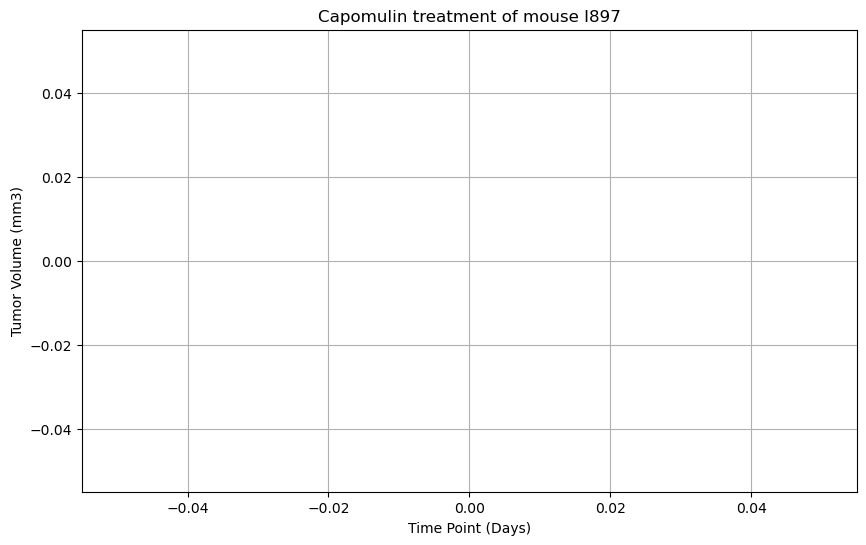

In [20]:
mouse_id = "I897"  # Example mouse ID
mouse_data = cleaned_mice_df[cleaned_mice_df['Mouse ID'] == 'I897']

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

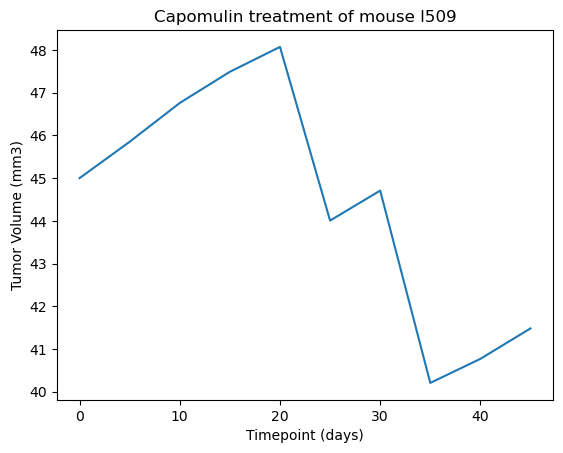

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


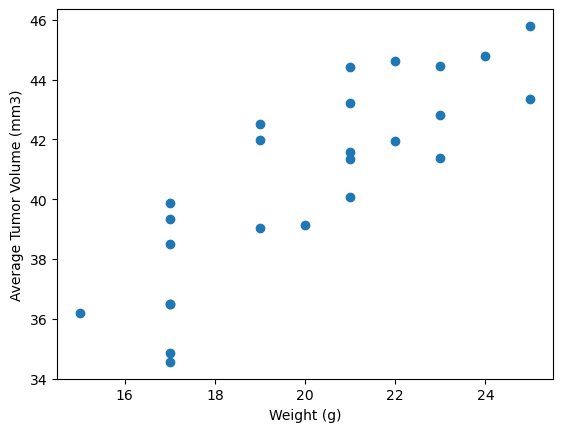

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


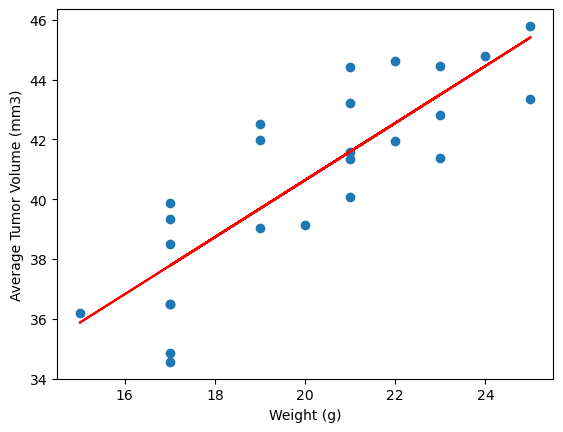

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
